<a href="https://colab.research.google.com/github/mendoza7788/data_exploration_operational_pipelines/blob/main/20230322_OTA_valves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
!pip install openpyxl pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set the file path to the .csv file in your Google Drive
file_path = '/content/info_valvulas.xlsx'

# Read the dataset from the file
df = pd.read_excel(file_path, engine='openpyxl')

# Check column names in the DataFrame
print(df.columns)

# Display the first few rows
df.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive
Index(['Fecha(mm/dd/aa hh:mm)', 'f_paramo(bph)', 'f_tumaco(bph)',
       'ps_orito(psi)', 'ps_guamues(psi)', 'pe_alisales(psi)',
       'ps_alisales(psi)', 'ps_paramo(psi)', 'pe_cusungo(psi)',
       'ps_cusungo(psi)', 'pe_san_juan1(psi)', 'ps_san_juan1(psi)',
       'pe_san_ramon', 'ps_san_ramon', 'pe_alto(psi)', 'ps_alto(psi)',
       'pe_guabo(psi)', 'ps_guabo(psi)', 'pe_monterrey(psi)',
       'ps_monterrey(psi)', 'pe_betania(psi)', 'ps_betania(psi)',
       'pe_chucunez(psi)', 'ps_chucunez(psi)', 'pe_ospina_perez(psi)',
       'ps_ospina_perez(psi)', 'pe_junin(psi)', 'ps_junin(psi)',
       'pe_pailon(psi)', 'ps_pailon(psi)', 'pe_guayacana(psi)',
       'ps_guayacana(psi)', 'pe_llorente(psi)', 'ps_llorente(psi)',
       'pe_hacienda_escocia(psi)', 'ps_hacienda_escocia(psi)',
       'pe_pueblo_nuevo(psi)', 'ps_pueblo_nuevo(psi)', 'pe_chilvisito(psi)',
       

,Fecha(mm/dd/aa hh:mm),f_paramo(bph),f_tumaco(bph),ps_orito(psi),ps_guamues(psi),pe_alisales(psi),ps_alisales(psi),ps_paramo(psi),pe_cusungo(psi),ps_cusungo(psi),...,ps_hacienda_escocia(psi),pe_pueblo_nuevo(psi),ps_pueblo_nuevo(psi),pe_chilvisito(psi),ps_chilvisito(psi),pe_aguas_claras(psi),ps_aguas_claras(psi),pe_camaroneras(psi),ps_camaroneras(psi),pe_tumaco(psi)
0,2022-12-16 10:17:00,1666.971651,952.790199,874.911439,1699.021089,149.489998,1567.160150,753.677915,775.865742,774.105239,...,5.600519,30.977210,29.414710,37.110004,37.485004,45.242460,45.121230,38.062500,36.750000,36.566403
1,2022-12-16 10:22:00,1667.676067,950.606958,874.947548,1698.191264,149.180820,1567.021747,750.440646,772.979665,771.396662,...,5.681252,31.000000,29.437500,37.125000,37.500000,45.250000,45.125000,38.062500,36.750000,36.649532
2,2022-12-16 10:27:00,1666.783082,949.008745,874.978162,1697.347206,148.896840,1566.982905,747.350793,772.687500,771.125000,...,5.687500,31.000000,29.437500,37.125000,37.500000,45.250000,45.125000,38.092444,36.797911,36.730673
3,2022-12-16 10:32:00,1666.794920,947.894850,874.968863,1697.439118,149.046403,1567.103617,744.094747,770.669993,769.217539,...,5.687500,31.011603,29.472310,37.210342,37.556894,45.340582,45.306164,38.346618,37.204589,36.807279
4,2022-12-16 10:37:00,1667.732340,948.087479,874.809144,1701.285368,150.919307,1567.159976,742.180352,769.371153,767.989544,...,7.265572,31.057459,29.609877,37.303096,37.618731,45.372543,45.370086,38.375000,37.250000,36.893603


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26200 entries, 0 to 26199
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Fecha(mm/dd/aa hh:mm)     26200 non-null  datetime64[ns]
 1   f_paramo(bph)             26200 non-null  float64       
 2   f_tumaco(bph)             26196 non-null  float64       
 3   ps_orito(psi)             26200 non-null  float64       
 4   ps_guamues(psi)           26200 non-null  float64       
 5   pe_alisales(psi)          26200 non-null  float64       
 6   ps_alisales(psi)          26200 non-null  float64       
 7   ps_paramo(psi)            26200 non-null  float64       
 8   pe_cusungo(psi)           26183 non-null  float64       
 9   ps_cusungo(psi)           26183 non-null  float64       
 10  pe_san_juan1(psi)         26174 non-null  float64       
 11  ps_san_juan1(psi)         25879 non-null  float64       
 12  pe_san_ramon      

In [6]:
# Filter the DataFrame for rows where f_paramo(bph) = 0
filtered_df = df[df['f_paramo(bph)'] > 1000]

# Use the describe method with custom percentiles on the filtered DataFrame
percentiles = [0.05, 0.5, 0.75, 0.9, 0.95, 0.99]
description = filtered_df.describe(percentiles=percentiles)
print(description)

# Export the summary statistics to a new xlsx file
output_file_path = 'summary_statistics_3.xlsx'
description.to_excel(output_file_path, engine='openpyxl')

       f_paramo(bph)  f_tumaco(bph)  ps_orito(psi)  ps_guamues(psi)  \
count    6702.000000    6701.000000    6702.000000      6702.000000   
mean     1636.474457    1253.624402     901.189496      1702.677909   
std       113.230608     468.135023      47.278214        94.158980   
min      1000.800916       0.000000     325.968659         0.000000   
5%       1433.813501     254.899880     839.459324      1683.274054   
50%      1649.361873    1318.476222     899.402736      1711.305116   
75%      1702.291499    1627.045555     936.511281      1717.621674   
90%      1754.088319    1798.155210     953.353749      1722.605131   
95%      1778.060574    1880.723926     965.788698      1725.823599   
99%      1824.092924    1950.945349     993.277526      1732.109657   
max      1877.097380    2046.620617    1041.746466      1751.777961   

       pe_alisales(psi)  ps_alisales(psi)  ps_paramo(psi)  pe_cusungo(psi)  \
count       6702.000000       6702.000000     6702.000000      6702.0

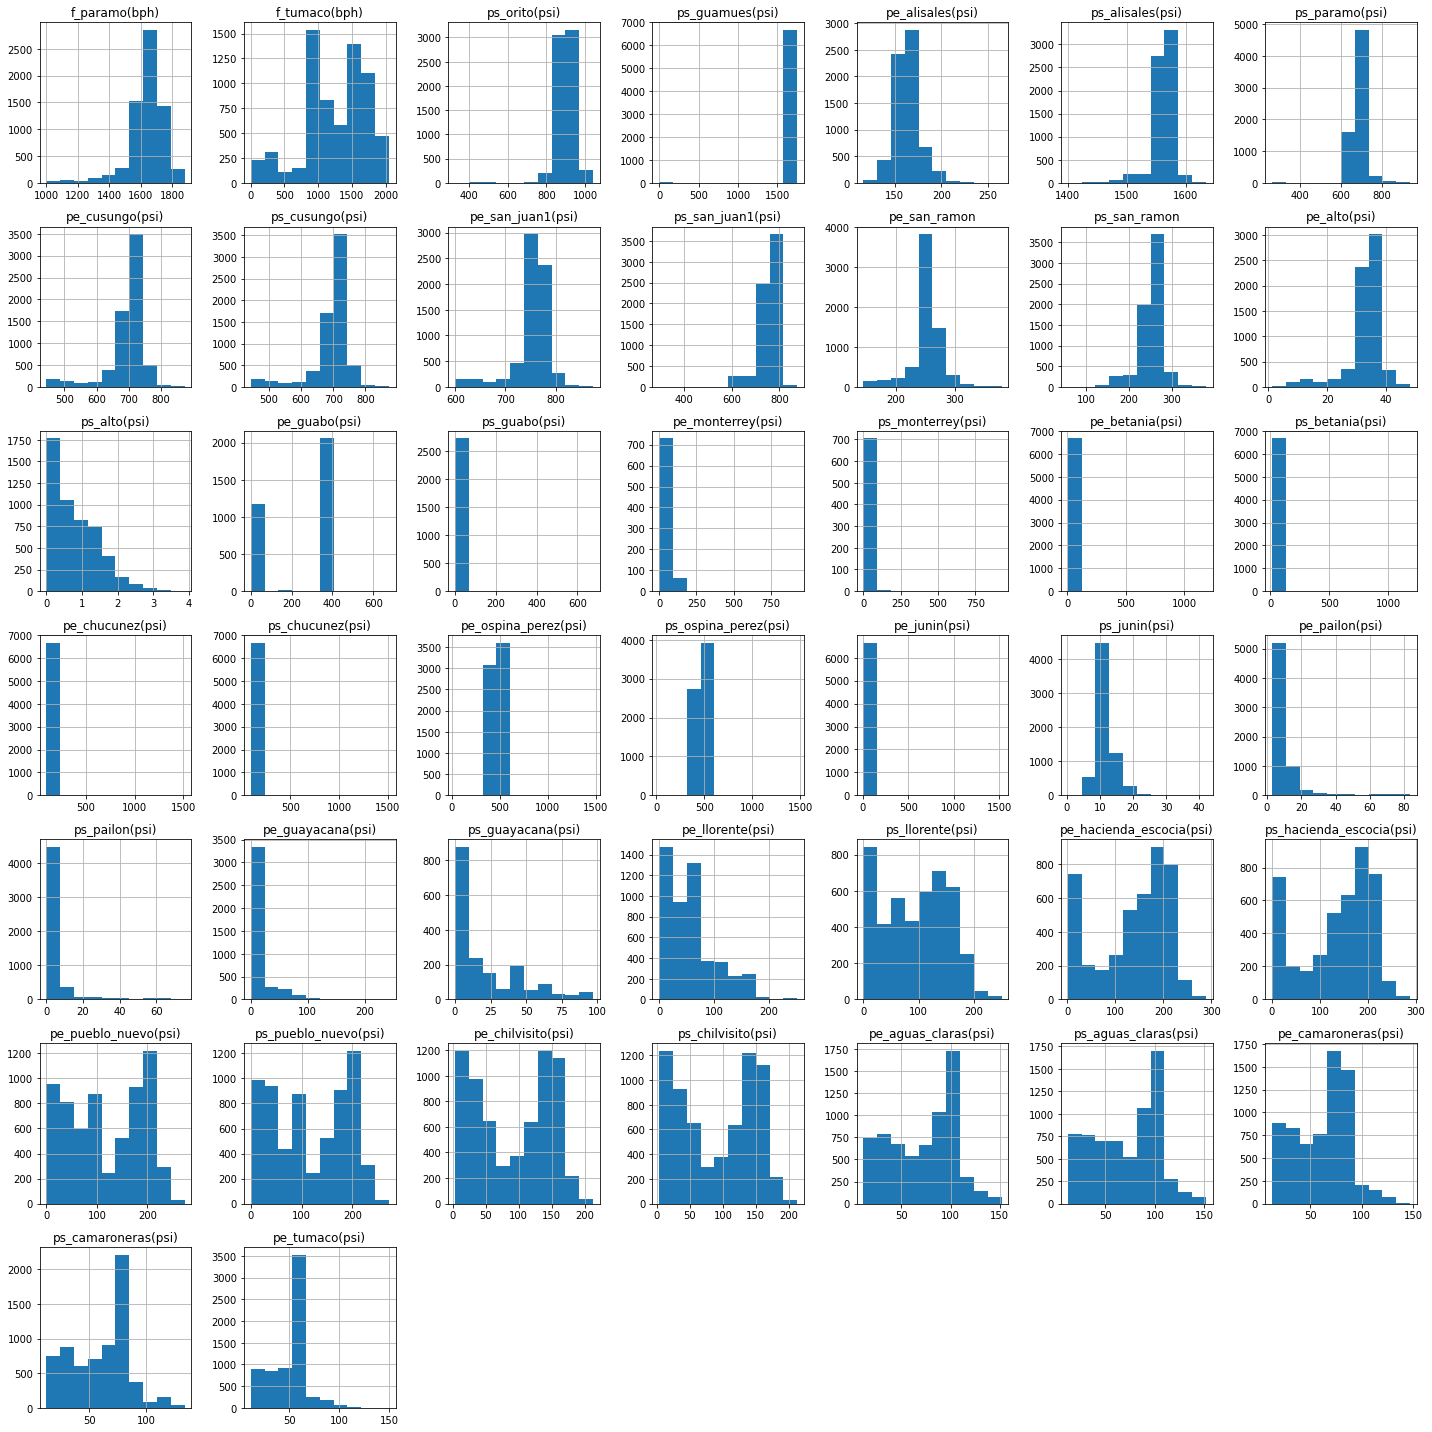

In [17]:
# Drop the "Fecha(mm/dd/aa hh:mm)" column
filtered_df = filtered_df.drop(columns=['Fecha(mm/dd/aa hh:mm)'])

# Plot the histograms for each remaining column of the filtered DataFrame
filtered_df.hist(figsize=(20, 20))
plt.tight_layout()
plt.show()